<a href="https://www.kaggle.com/code/ryanrakusinn/task-3-ryan?scriptVersionId=102217194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-affordability-in-canada/Structural-dwellings-household-size.csv
/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 by regions.csv
/kaggle/input/housing-affordability-in-canada/income-distribution-2012-2020.csv
/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 federal and provincial.csv
/kaggle/input/housing-affordability-in-canada/population_dwellings_count.csv
/kaggle/input/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv
/kaggle/input/housing-affordability-in-canada/population-by-region-1946-2022.csv
/kaggle/input/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/ottawa_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/saguenay_section1_.csv
/kaggle/input/housing-aff

In [2]:
cpi = pd.read_csv('../input/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv')
hpi = pd.read_csv('../input/housing-affordability-in-canada/HPI 1981-2022 by regions.csv')
rates = pd.read_csv('../input/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv')

In [4]:
#hpi = hpi.iloc[1: , :]
#hpi = hpi.iloc[:1455 , :]
#hpi["Month-Year"].iloc[0:1198] = hpi["Month-Year"].iloc[0:1198].astype(str).str.slice(4, 6)
#hpi["Month-Year"].iloc[1198:1455] = hpi["Month-Year"].iloc[1198:1455].astype(str).str.slice(0, 2)
#hpi['Month-Year'] = hpi['Month-Year'].astype(str)
#hpi['Month-Year'] = hpi['Month-Year'].str.extract('(d+)', expand=False)
#numeric_filter = filter(str.isdigit, hpi['Month-Year'])
#hpi['Month-Year'] = "".join(numeric_filter)
#dataTypeSeries = hpi.dtypes
#dataTypeSeries
hpi["Month-Year"] = hpi["Month-Year"].astype(str)
hpi["Month-Year"] = hpi["Month-Year"].map(lambda x: x.lstrip(' -ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz').rstrip(' -ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'))
#h = hpi["Month-Year"].tolist()

In [5]:

#hpi[['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia']] = hpi[['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia']].astype(str)
#hpi['Canada'] = hpi['Canada'].map(lambda x: x.rstrip('E'))
#hpi['Newfoundland and Labrador'] = hpi['Newfoundland and Labrador'].map(lambda x: x.rstrip('E'))
#hpi['Prince Edward Island'] = hpi['Prince Edward Island'].map(lambda x: x.rstrip('E'))
#hpi['Nova Scotia'] = hpi['Nova Scotia'].map(lambda x: x.rstrip('E'))
#hpi['New Brunswick'] = hpi['New Brunswick'].map(lambda x: x.rstrip('E'))
#hpi['Quebec'] = hpi['Quebec'].map(lambda x: x.rstrip('E'))
#hpi['Ontario'] = hpi['Ontario'].map(lambda x: x.rstrip('E'))
#hpi['Manitoba'] = hpi['Manitoba'].map(lambda x: x.rstrip('E'))
#hpi['Saskatchewan'] = hpi['Saskatchewan'].map(lambda x: x.rstrip('E'))
#hpi['Alberta'] = hpi['Alberta'].map(lambda x: x.rstrip('E'))
#hpi['British Columbia'] = hpi['British Columbia'].map(lambda x: x.rstrip('E'))
#hpi[['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia']] = hpi[['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia']].astype(float)
#hpi = hpi.drop(columns=['Atlantic Region', 'Québec, Quebec', 'Sherbrooke, Quebec', 'COORDINATE'])


KeyError: "['Ontario', 'British Columbia'] not in index"

In [6]:
#cpi["REF_DATE"] = cpi["REF_DATE"].astype(str).str.slice(2, 4)
#cpi = cpi.iloc[27: , :]
#cpi = cpi.drop(columns=['DGUID', 'UOM_ID', 'VECTOR', 'COORDINATE'])
cpiAll = cpi.loc[cpi['Products and product groups'] == 'All-items']
cpiAllOne = cpi.loc[cpi['Products and product groups'] == 'All-items (1992=100)']
cpiGS = cpi.loc[cpi['Products and product groups'] == 'Goods and services']
cpiMIC = cpi.loc[cpi['Products and product groups'] == 'Mortgage interest cost']
cpiHousing = cpi.loc[cpi['Products and product groups'] == 'Housing (1986 definition)']
cpi = pd.concat([cpiAll, cpiAllOne, cpiGS, cpiMIC, cpiHousing])
cpiCAN = cpi.loc[cpi['GEO'] == 'Canada']
cpiON = cpi.loc[cpi['GEO'] == 'Ontario']
cpiNFL = cpi.loc[cpi['GEO'] == 'Newfoundland and Labrador']
cpiPEI = cpi.loc[cpi['GEO'] == 'Prince Edward Island']
cpiNS = cpi.loc[cpi['GEO'] == 'Nova Scotia']
cpiNB = cpi.loc[cpi['GEO'] == 'Nova Brunswick']
cpiQB = cpi.loc[cpi['GEO'] == 'Quebec']
cpiMB = cpiNB = cpi.loc[cpi['GEO'] == 'Manitoba']
cpiSK = cpiNB = cpi.loc[cpi['GEO'] == 'Saskatchewan']
cpiAB = cpiNB = cpi.loc[cpi['GEO'] == 'Alberta']
cpiBC = cpi.loc[cpi['GEO'] == 'British Columbia']
cpiYK = cpi.loc[cpi['GEO'] =='Whitehorse, Yukon']
cpiNWT = cpi.loc[cpi['GEO'] =='Yellowknife, Northwest Territories']
cpiNU = cpi.loc[cpi['GEO'] =='Iqaluit, Nunavut']
#h = cpi['GEO'].unique()
cpi = pd.concat([cpiCAN, cpiON, cpiGS, cpiNFL, cpiPEI, cpiNS, cpiNB, cpiQB, cpiMB, cpiSK, cpiAB, cpiBC, cpiYK, cpiNWT, cpiNU])

In [ ]:
rates['Date'] = rates['Date'].str[:4]
rates = rates.groupby('Date').mean()
rates.insert(0, 'Year', range(1951, 1951 + len(rates)))
rates


In [7]:
hpi['Month-Year'] = pd.to_numeric(hpi['Month-Year'], errors='coerce')
#h = hpi['Month-Year'].tolist()
hpi['Month-Year'].loc[hpi['Month-Year'] > 80] = hpi['Month-Year'].loc[hpi['Month-Year'] > 80].astype(float) + 1900
hpi['Month-Year'].loc[hpi['Month-Year'] < 80] = hpi['Month-Year'].loc[hpi['Month-Year'] < 80].astype(float) + 2000
#hpi.loc[hpi['Month-Year'] < 80] + 2000
#hpi['Month-Year'] = hpi['Month-Year'] + 1900
hpi['Month-Year'] = hpi['Month-Year'].fillna(0)
hpi['Month-Year'] = hpi['Month-Year'].astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Unnamed: 0,Type,Month-year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,...,Manitoba,Saskatchewan,Alberta,British Columbia,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia",Month-Year,year,month
0,0,House and Land,Jan-81,38.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,90.5,128.7,0,1981,1
1,1,House and Land,Feb-81,38.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.1,0,1981,2
2,2,House and Land,Mar-81,39.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.2,130.8,0,1981,3
3,3,House and Land,Apr-81,39.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,130.8,0,1981,4
4,4,House and Land,May-81,40.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,91.8,132.5,0,1981,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1489,Land only,Feb-22,116.1,102.8,102.4,103.1,103.5,102.5,119.0,...,110.2,100.8,103.7,119.7,118.6,120.9,108.7,0,2022,2
1490,1490,Land only,Mar-22,116.5,102.8,102.4,104.5,103.5,102.5,120.5,...,110.4,101.1,104.6,120.2,118.6,121.3,111.4,0,2022,3
1491,1491,Land only,Apr-22,116.7,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,104.8,120.6,118.6,121.7,111.4,0,2022,4
1492,1492,Land only,May-22,116.8,102.8,102.4,104.5,103.5,102.5,120.5,...,110.6,101.3,105.4,120.6,118.6,121.7,111.4,0,2022,5


In [ ]:
hpi

In [8]:
#aggFunc = {'Canada': 'sum'}
hpi = hpi.loc[(hpi['Type'] == 'House and Land')]
hpi = hpi.groupby('year', as_index=False).mean()
#cpi = cpi.groupby("REF_DATE").mean()
#data = pd.concat([hpi, cpi])

In [ ]:
import matplotlib.pyplot as plt


rates.replace(0, np.nan, inplace=True)
MI = plt.scatter(rates['Mortgage Rate'], rates['Interest Rate'])


MI

[[1.         0.96761888]
 [0.96761888 1.        ]]


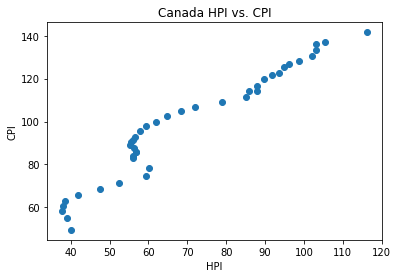

In [9]:
import matplotlib.pyplot as plt
cpican = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1980) & (cpi['GEO'] == 'Canada')]
hpican = hpi['Canada'].loc[hpi['year'] < 2022]
graph1 = plt.scatter(hpican, cpican)
plt.title("Canada HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph1
corr = np.corrcoef(hpican, cpican)
print(corr)

In [ ]:
cpican = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1980) & (cpi['GEO'] == 'Canada')]
hpican = hpi['Canada'].loc[hpi['year'] < 2022]
graph1 = plt.scatter(hpican, cpican)
plt.title("Canada HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph1
corr = np.corrcoef(hpican, cpican)
print(corr)

In [ ]:
# 95 pei, 86 everyone else
cpinfl = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'Newfoundland and Labrador')]
hpinfl = hpi['Newfoundland and Labrador'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph2 = plt.scatter(hpinfl, cpinfl)
plt.title("Newfoundland and Labrador HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph2
corr = np.corrcoef(hpinfl, cpinfl)
print(corr)

In [ ]:
cpipei = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1994) & (cpi['GEO'] == 'Prince Edward Island')]
hpipei = hpi['Newfoundland and Labrador'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1994)]
graph3 = plt.scatter(hpipei, cpipei)
plt.title("Prince Edward Island HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph3
corr = np.corrcoef(hpipei, cpipei)
print(corr)

In [ ]:
cpins = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'Nova Scotia')]
hpins = hpi['Nova Scotia'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph4 = plt.scatter(hpins, cpins)
plt.title("Nova Scotia HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph4
corr = np.corrcoef(hpins, cpins)
print(corr)

In [ ]:
cpiregion = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'New Brunswick')]
hpiregion = hpi['New Brunswick'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph = plt.scatter(hpiregion, cpiregion)
plt.title("New Brunswick HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph
corr = np.corrcoef(hpiregion, cpiregion)
print(corr)

In [ ]:
cpiregion = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'Quebec')]
hpiregion = hpi['Quebec'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph = plt.scatter(hpiregion, cpiregion)
plt.title("Quebec HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph
corr = np.corrcoef(hpiregion, cpiregion)
print(corr)

[[1.         0.95344163]
 [0.95344163 1.        ]]


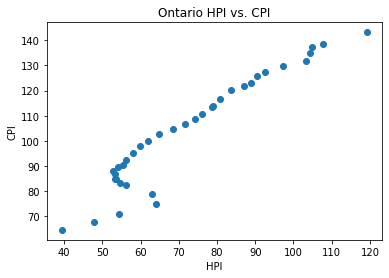

In [12]:
cpiregion = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'Ontario')]
hpiregion = hpi['Ontario '].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph = plt.scatter(hpiregion, cpiregion)
plt.title("Ontario HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph
corr = np.corrcoef(hpiregion, cpiregion)
print(corr)

In [ ]:
cpiregion = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'Manitoba')]
hpiregion = hpi['Manitoba'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph = plt.scatter(hpiregion, cpiregion)
plt.title("Manitoba HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph
corr = np.corrcoef(hpiregion, cpiregion)
print(corr)

In [ ]:
cpiregion = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'Saskatchewan')]
hpiregion = hpi['Saskatchewan'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph = plt.scatter(hpiregion, cpiregion)
plt.title("Saskatchewan HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph
corr = np.corrcoef(hpiregion, cpiregion)
print(corr)

In [ ]:
cpiregion = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'Alberta')]
hpiregion = hpi['Alberta'].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph = plt.scatter(hpiregion, cpiregion)
plt.title("Alberta HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph
corr = np.corrcoef(hpiregion, cpiregion)
print(corr)

[[1.         0.80027169]
 [0.80027169 1.        ]]


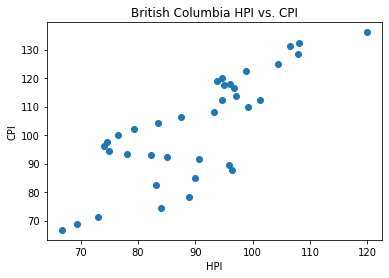

In [11]:
cpiregion = cpi['CPI'].loc[(cpi['Products and product groups'] == 'All-items') & (cpi['REF_DATE'] > 1985) & (cpi['GEO'] == 'British Columbia')]
hpiregion = hpi['British Columbia '].loc[(hpi['year'] < 2022) & (hpi['year'] > 1985)]
graph = plt.scatter(hpiregion, cpiregion)
plt.title("British Columbia HPI vs. CPI")
plt.xlabel("HPI")
plt.ylabel("CPI")
graph
corr = np.corrcoef(hpiregion, cpiregion)
print(corr)

In [ ]:
#hpi['British Columbia']
for col in hpi.columns:
    print(col)